# Data and Statistics
Statistics form a large part of the core of quantitative science: they are the de facto standard by which quantitative data is interogated and analysed (but not the only method). Julia has first class support for statistics and they are presented in an initiutive functional manner. The two major packages we will interact with are: ``Statistics`` and ``StatsBase``. For many tasks ``StatsBase`` is more than sufficient.

In [1]:
using StatsBase, Statistics, Plots, Random

## 1.1 Basic Statistics


Let's generate some random numbers from several different distributions and computer some basic statistics. We will examine a uniform, normal, and Poisson distribution. 

In [2]:
ru = rand(100000);
rn = randn(100000);
rp = randexp(100000);

We now have three lists of random numbers but they were generated without any reference to the parameters that define them (the distributions are easy to guess from the function names). Let's try and work them out using the StatsBase package. The most obvious statistics to compute are the mean and the standard deviation.

In [3]:
av_u = mean(ru)
std_u = std(ru)

av_n = mean(rn)
std_n = std(rn)

av_p = mean(rp)
std_p = std(rp)

println("The means and standard deviations are:\n Uniform: ($(av_u), $(std_u)),\n Normal: ($(av_n), $(std_n)),\n Poisson: ($(av_p), $(std_p)).")

The means and standard deviations are:
 Uniform: (0.5010989276195061, 0.2885175940618469),
 Normal: (0.0016730356019278166, 1.0001824932019634),
 Poisson: (1.0009854125194597, 1.0035668066822703).


The theoretical predictions for the means and standard deviations in terms of the parameters that define them are:

Uniform: $\left(\frac{a+b}{2}, \frac{b-a}{\sqrt{12}}\right)$

Normal: $\left(\mu, \sigma\right)$

Poisson: $\left(\lambda, \sqrt{\lambda}\right)$.

Solving these gives $b \approx 1, a \approx 0$, $\mu \approx 0, \sigma \approx 1$, and $\lambda \approx 1$. These are in close agreement with the [documentation](https://docs.julialang.org/en/v1/stdlib/Random/) which state the default distributions are:

Uniform: $ X \sim U([0,1]) $

Normal: $ X \sim N(0,1^2) $

Poisson: $ X \sim \text{Poisson}(1) $.

## 1.2 Random Sampling

Sampling is an interesting, and sometimes reasonably complex proposition. In general, it just means to take draws randomly from a set where the draw probability is defined by a probability distributions. A classic example is to think of drawing coloured stones from a bag where the colours each have a different proportional representation. There are some subtlies when considering samples from infinite sets but this is beyond the scope of this course. The "coloured stones in a bag" is a good working mental model to work with. There is basic sampling provided in the random package, indeed we have already taken a few samples. Let's take ten samples from a discrete distribution defined by a set.

In [4]:
sample_set = [0, 1, 3, "as", 48, 1.022, 1,1,1,1 + 0.2im];
rand(sample_set, 50)

50-element Vector{Any}:
 1.0 + 0.2im
 1.0 + 0.2im
     1
 1.0 + 0.2im
     1.022
      "as"
    48
    48
     1
     1
     1
 1.0 + 0.2im
     1
     ⋮
    48
     1
     1
     3
     1.022
     0
     1
     1.022
     1
     1
     1
    48

Notice that the set is completely arbitrary, composed of many distinct and non-composable types. The random sampler is very flexible. It will also work on iterables such as generators and dictionaries:

In [5]:
dict = Dict(:k => 10, :a => 50, :sam => 40);
it = 4:123:1000;

println("A random sample from a dictionary: $(rand(dict, 10))")
println("A random sample from a generator: $(rand(it, 20))")

A random sample from a dictionary: [:sam => 40, :sam => 40, :a => 50, :sam => 40, :a => 50, :sam => 40, :a => 50, :a => 50, :k => 10, :k => 10]
A random sample from a generator: [4, 865, 250, 250, 742, 4, 742, 373, 496, 865, 619, 250, 988, 865, 619, 988, 127, 373, 988, 4]


### 1.2.1 Sampling without replacement

So far we have sampled with replacement: we put the stones back into the back after we have drawn them. This is not always realistic, nor is it always an appropriate model for the task at hand. Julia also allows for sampling without replacement which is done through the ``sample`` function from the ``StatsBase`` package. The function is quite versatile and the full [documentation](https://juliastats.org/StatsBase.jl/stable/sampling/) offers more details. The ``replace`` keyword is ``true`` by default and we will draw 3 samples from our original ``sample_set`` without replacement:

In [6]:
sample(sample_set, 3, replace=false)

3-element Vector{Any}:
     1
 1.0 + 0.2im
     1

If we tried to draw more samples than we had available it would throw an error:

In [7]:
sample(sample_set, 300, replace=false)

LoadError: Cannot draw more samples without replacement.

### 1.2.2 Random Permutations

Random permutations may be considered a special case of sampling without replacement i.e drawing samples until there are none left to draw. Julia offers the ``randperm(n)`` function from the ``Random`` package for this. The function generates a vector of length ``n`` with a list of integers reperesenting a permutation. We could use this function to sample without replacement by simply taking a subset of the output but this is inefficient because we would have to generate the entire vector.

In [8]:
random_permutation = randperm(15)

15-element Vector{Int64}:
 11
 14
  1
  8
  3
  2
 10
 13
  7
  6
  5
  9
 15
 12
  4

### 1.2.3 Sampling With Weighted Bias

We often find that we have multiple degenerate items such as coloured stones that can be specified by how frequently we might expect them to come up i.e. their proportion. We could correctly sample this by adding multiple repeats in the ``sample_vector`` but this is cumbersome and memory inefficient. The ``sample`` function supports an optional ``weights`` vector which allows us to specify the expected weights of each category in the sample. The weights vector needs to be constructed with the ``Weights`` function from the ``StatsBase`` package.

In [9]:
cols = ["blue", "red", "green"]
col_weights = Weights([0.1, 0.4, 0.5])
sample_colours = sample(cols, col_weights, 100)

100-element Vector{String}:
 "green"
 "green"
 "red"
 "red"
 "green"
 "red"
 "blue"
 "green"
 "red"
 "green"
 "green"
 "green"
 "red"
 ⋮
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "green"
 "red"
 "red"
 "red"
 "green"
 "red"

### 1.2.4 Seeding

An important part of generating samples is the notion of random seeding. Random numbers generated by a computer are not truly random. More often than not they are generated using chaotic dynamical system such as the Mersenne Twister. Where we start in this system is called the seed and by setting the seed we can get a string of random numbers that doesn't change. This is useful when you need predictable randomness and in general it is good practice to set the seed at the beginning of every development session: it can be turned off for testing. Try running this cell multiple times and then going back and running some of the other cells. Notice how this one does not change? This is because the seed is set and the random numbers are drawn in the same fashion every time.

In [10]:
Random.seed!(1)
rand(1:10, 5)

5-element Vector{Int64}:
  1
  4
  7
  7
 10

## 1.4 Distributions

We have examined some basic distributions which are supported in the ``Random`` package. Usually, these are sufficient for basic purposes but we may find that we need to go a bit deeper. For more advanced purposes we can turn to the ``Distributions`` package.

In [11]:
using Distributions

The ``Distributions`` package gives the options to work more abstractly with distributions as their own type. The root type in this package is ``Sampleable``. This allows us to operate not on a sample from the distribution but the distribution itself as an object. It also suggests that we may define our own Distribiution types at a later point. Let's start by defining a few Distributions.

In [12]:
d1 = Normal(2,4);
d2 = Binomial(20, 0.2);

We can now interogate these distributions for several classic statistics: ``mean``, ``std``, ``var``, ``quantile``, ``median``, ``mode``, ``skew``, ``kurtosis`` etc. A full list can be found in the [documentation](https://juliastats.org/Distributions.jl/stable/univariate/). Notice that we have overloaded several functions but this should not a problem courtesy of Julia's multiple dispatch. Let's find out some basic properties of our distributions.

In [13]:
function printdistsummary(d::UnivariateDistribution)
    ext = extrema(d)
    av = mean(d)
    s = std(d)
    sk = skewness(d)
    k = kurtosis(d)
    thirtyninetyq = quantile(d, [0.3,0.9])
    println("The distribution has a support of $(ext). It has a mean of $(av) and a standard deviation of $(s). The skew and kurtosis are $(sk) and $(k), repsectively. The interval that defines the 30th to 90th quartile is $(thirtyninetyq).\n")
end
printdistsummary(d1)
printdistsummary(d2)

The distribution has a support of (-Inf, Inf). It has a mean of 2.0 and a standard deviation of 4.0. The skew and kurtosis are 0.0 and 0.0, repsectively. The interval that defines the 30th to 90th quartile is [-0.09760205083216356, 7.1262062621784015].

The distribution has a support of (0, 20). It has a mean of 4.0 and a standard deviation of 1.7888543819998317. The skew and kurtosis are 0.3354101966249685 and 0.01249999999999994, repsectively. The interval that defines the 30th to 90th quartile is [3, 6].



### 1.4.1 Multivariate Distributions 

The above distributions are examples of *univariate* distributions i.e. they define the properties of a random number. This idea may easily be extended to a vector of random numbers and these distributions are referred to as *multivariate*. The ``Distributions`` package supports multivariate distributions. Let's examine the multinomial distribution which is a generalisation of the binomial distribution to several categories.

In [14]:
d3 = Multinomial(10, [0.4, 0.2, 0.3, 0.1])
mean(d3)

4-element Vector{Float64}:
 4.0
 2.0
 3.0
 1.0

Notice how the mean is now reported as a vector for each of the categories in the distribution. Not all statistics immediately generalise to multi-variate distributions. The [documentation](https://juliastats.org/Distributions.jl/stable/multivariate/) outlines which multivariate distributions are supported and the methods which extend to them.

### 1.4.2 Distribution Sampling

In general, if we know the CDF of a random variable we may sample from its distribution using just a uniform sample from the interval [0,1]. Doing this in practice is cumbersome. The ``Distributions`` package allows us to use each distribution as a generator in the ``rand`` function. Let's take 10 samples from each of our distributions.

In [15]:
println(rand(d1, 10))
println(rand(d2, 10))
println(rand(d3, 10))

[3.07025767451554, 8.99973477011298, -1.3040831676771898, -2.171009671564387, 0.6834646165743836, 0.07099233836353758, 6.728970813600634, 3.9227656581799186, 1.9897672777827695, 7.738450206855669]
[6, 5, 4, 5, 2, 5, 5, 2, 4, 0]
[4 7 2 3 4 3 4 4 3 3; 4 1 1 3 1 2 2 2 3 1; 2 1 7 4 4 3 3 3 3 3; 0 1 0 0 1 2 1 1 1 3]


Notice that the types are preserved for each of the distributions and that for the multi-variate distribution each sample is a column vector from each of the categories.

### Distribution Fitting

Occasionally, we have a set of random data which we believe to be distributed in a particular way. The ``fit(d, x)`` funciton in the ``Distributions`` package allows us to define the parameters of the specificed distribution ``d`` which is a "best" fit for the data ``x``. Let's define some data and fit a ``Uniform`` distribution to it.

In [16]:
data = randn(100);
d_fit = fit(Uniform, data)

Uniform{Float64}(a=-2.2695879261548253, b=2.5472812388810935)

## 1.5 Hypothesis Testing

Hypothesis testing is a critical component of life sciences. The general procedure is to propose a model which we believe describes the data, or some key element of the system we are interested in. Then, we propose a hypothesis within the context of the model such as $\mu = 1$ for a normal distribution. Finally, we interrogate our hypothesis with respect to the data and receive a critical value (usually a p-value) with which we decide to reject or accept our hypothesis. It is important to stress that standard critical values, such as $ p < 0.05$, are ***not*** the be all and end all of data analysis. Indeed, statistical tests and models are not the be-all and end-all of quantitative modelling. They are useful *tools* which can form part of the argument, but they must be applied and used carefully. For more information about this please research "P-hacking".

In [17]:
using HypothesisTests

Let's examine a simple hypothesis that some normally distributed data comes from a distribution with a mean of 0.1. For this we will need a one sample T test. The `HypothesisTests` package provides this as ``OneSampleTTest``. Let's try it out:

In [71]:
rv = randn(1000)
OneSampleTTest(rv, 0.1)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0.1
    point estimate:          0.00367545
    95% confidence interval: (-0.05703, 0.06438)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0019

Details:
    number of observations:   1000
    t-statistic:              -3.1138634826852822
    degrees of freedom:       999
    empirical standard error: 0.030934094052638778


The package provides many easy-to-use tests which are directly linkable to data. Full information about which tests have been implemented, the specific implementation details, and how to use them are found the in the [documentation](https://juliastats.org/HypothesisTests.jl/stable/).

# 2.0 Data and DataFrames

Statistics are most useful in the context of real data. The native Julia data file is the JLD file and this is supported through the ``JLD`` package. More commonly we will be working with delimited files and these are supported through the ``DelimitedFiles`` and ``CSV`` packages. 

### 2.1 JLD
Let's start by loading and saving some variables using JLD.

In [18]:
using JLD

Let's create a dummy matrix and save it using the ``save(dir, var, julia_obj)`` function. The save function takes a Julia object (``julia_obj``) and saves it with a variable name (``var``), specified as a string, under a directory (``dir``), also specified as a string.

In [19]:
matrix_data = Matrix{Float64}(rand(10,10))
save("./data/matrix_data.jld", "dummy_matrix", matrix_data)

The method is extensible to an arbitrary number of objects using the syntax ``save(dir, var1, julia_obj1, var2, julia_obj2...)``. Now, we can load that exact same object using the ``load(dir, var)`` syntax. Note that it does not load the variables stored in the file into the name space. 

In [20]:
loaded_matrix = load("./data/matrix_data.jld", "dummy_matrix")

10×10 Matrix{Float64}:
 0.319402   0.470669   0.413297   0.261633  …  0.46844   0.479567   0.33769
 0.0912716  0.34354    0.0213679  0.736995     0.177463  0.804929   0.643001
 0.89696    0.424      0.798754   0.937683     0.877902  0.210224   0.403532
 0.714033   0.330499   0.303047   0.860061     0.51347   0.411187   0.329488
 0.538664   0.734206   0.428627   0.072798     0.52617   0.597364   0.240414
 0.60415    0.161308   0.64945    0.430003  …  0.175182  0.666644   0.344127
 0.533609   0.748538   0.632241   0.740058     0.880008  0.262539   0.596667
 0.962899   0.684452   0.902376   0.85099      0.313745  0.498616   0.904551
 0.853496   0.0338177  0.98465    0.757291     0.544144  0.778666   0.537128
 0.205754   0.18923    0.294099   0.320424     0.194827  0.0163769  0.726646

In [21]:
dummy_matrix

LoadError: UndefVarError: dummy_matrix not defined

If the ``load`` function is called without variable names it will load the whole workspace as a dictionary. If there are multiple variables it can be called with one, or many, variable names and these will be loaded in a tuple in the order that they are specified. Let's try it out:

In [22]:
loaded_dict = load("./data/saved_workspace_data.jld")

Dict{String, Any} with 3 entries:
  "my_matrix" => [0.348807 0.107391 … 0.124624 0.776883; 0.0865221 0.0121754 … …
  "my_vector" => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0…
  "my_string" => "Some stringed data"

In [23]:
loaded_dict["my_vector"]

100-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [24]:
load("./data/saved_workspace_data.jld", "my_string")

"Some stringed data"

In [25]:
load("./data/saved_workspace_data.jld", "my_matrix", "my_string")

([0.3488070802771277 0.10739061572541786 … 0.12462416935636889 0.7768825802410784; 0.08652207001685552 0.01217541796449928 … 0.09908273896242259 0.07938635556116991; … ; 0.5584419711982266 0.4017322893076821 … 0.48654168794972597 0.06088948987461551; 0.11782310336900348 0.05862118946879169 … 0.7326880480539485 0.35304217076981725], "Some stringed data")

### 2.2 Delimited Files

A delimited file is a file usually stored in plain text which has entries seperated by a special character, often a comma, called a delimiter and another special character, often an "\n", to specify the end of a line. The delimiter tells the data loader when to treat the next set of characters as a new entry. The most common file type for data is the comma delimited CSV file with the ".csv" extension. Julia provides support for all delimited files using the ``DelimitedFiles`` package.

In [26]:
using DelimitedFiles

To write a delimited file we use the ``writedlm(dir, data, delimiter)`` function. The function can be called on vectors, matrices, or iterables. If no delimiter is provided it will default to spaces. Let's write the ``loaded_matrix`` variable as a delmited file in two ways:

In [27]:
writedlm("./data/matrix_nodelimiter.dlm", loaded_matrix)
writedlm("./data/matrix_Ydelimiter.dlm", loaded_matrix, 'Y')

Go and inspect the two files with a text editor; they will look very different. Loading a delimited file can be done with the ``readdlm(dir, delimiter, eol)`` function. The delimiter and end of line are assumed to optional but can be very important. Let's try and load both of the files we just wrote without specifying delimiters:

In [28]:
readdlm("./data/matrix_nodelimiter.dlm")

10×10 Matrix{Float64}:
 0.319402   0.470669   0.413297   0.261633  …  0.46844   0.479567   0.33769
 0.0912716  0.34354    0.0213679  0.736995     0.177463  0.804929   0.643001
 0.89696    0.424      0.798754   0.937683     0.877902  0.210224   0.403532
 0.714033   0.330499   0.303047   0.860061     0.51347   0.411187   0.329488
 0.538664   0.734206   0.428627   0.072798     0.52617   0.597364   0.240414
 0.60415    0.161308   0.64945    0.430003  …  0.175182  0.666644   0.344127
 0.533609   0.748538   0.632241   0.740058     0.880008  0.262539   0.596667
 0.962899   0.684452   0.902376   0.85099      0.313745  0.498616   0.904551
 0.853496   0.0338177  0.98465    0.757291     0.544144  0.778666   0.537128
 0.205754   0.18923    0.294099   0.320424     0.194827  0.0163769  0.726646

In [29]:
readdlm("./data/matrix_Ydelimiter.dlm")

10×1 Matrix{Any}:
 "0.319401867519004Y0.47066887013" ⋯ 133 bytes ⋯ "77129698455Y0.3376903758906221"
 "0.09127163892208834Y0.343539755" ⋯ 133 bytes ⋯ "86054419889Y0.6430006865746226"
 "0.8969601495433971Y0.4240000251" ⋯ 131 bytes ⋯ "02699493792Y0.4035315551593621"
 "0.7140334673079125Y0.3304985128" ⋯ 131 bytes ⋯ "8470653164Y0.32948833469928285"
 "0.53866402823155Y0.734206341928" ⋯ 126 bytes ⋯ "39501138612Y0.2404138652969987"
 "0.604149828911257Y0.16130794581" ⋯ 129 bytes ⋯ "41108545288Y0.3441265970914853"
 "0.5336085663333506Y0.7485377716" ⋯ 128 bytes ⋯ "38662943248Y0.5966672194744378"
 "0.9628985358994283Y0.6844519104" ⋯ 130 bytes ⋯ "57679371367Y0.9045512294366429"
 "0.8534956302242425Y0.0338177451" ⋯ 128 bytes ⋯ "59114630435Y0.5371283348527612"
 "0.20575377747524026Y0.189229747" ⋯ 135 bytes ⋯ "97204083862Y0.7266463060193881"

The first file loaded perfectly! That it is because it was written in the way that ``readdlm`` expects by default. The second file was assumed to be a vector of strings because the "Y" character forced everything in the line to be interpreted as a character. Specifying the correct delimiter fixes this problem:

In [30]:
readdlm("./data/matrix_Ydelimiter.dlm", 'Y')

10×10 Matrix{Float64}:
 0.319402   0.470669   0.413297   0.261633  …  0.46844   0.479567   0.33769
 0.0912716  0.34354    0.0213679  0.736995     0.177463  0.804929   0.643001
 0.89696    0.424      0.798754   0.937683     0.877902  0.210224   0.403532
 0.714033   0.330499   0.303047   0.860061     0.51347   0.411187   0.329488
 0.538664   0.734206   0.428627   0.072798     0.52617   0.597364   0.240414
 0.60415    0.161308   0.64945    0.430003  …  0.175182  0.666644   0.344127
 0.533609   0.748538   0.632241   0.740058     0.880008  0.262539   0.596667
 0.962899   0.684452   0.902376   0.85099      0.313745  0.498616   0.904551
 0.853496   0.0338177  0.98465    0.757291     0.544144  0.778666   0.537128
 0.205754   0.18923    0.294099   0.320424     0.194827  0.0163769  0.726646

#### 2.2.1 CSV

A CSV file is just a special type of delimited file - CSV stands for Comma Seperated Values. As such, DelimitedFiles can handle it with ease. However, due to its ubiquity in data storage there is a dedicated package and API calls for it in Julia: ``CSV``. The package also supports mutliple delimiters and offers many generic delimited file options. The generic functions are ``CSV.read`` and ``CSV.write``. Importantly, it is used as the backend for tabulated data in the DataFrames framework introduced in the next section.

### 2.3 DataFrames

A data frame is a table that specifies data: each row is a datapoint and each column has the data for a specific header in the data frame. They are very useful structures and make exploring and manipulating data very easy. Julia has first class support for data frames through the ``DataFrames`` and ``CSV`` packages. The ``DataFrames`` package has extensive and good [documentation](https://dataframes.juliadata.org/stable/).

In [31]:
using DataFrames, CSV

### 2.3.1 DataFrame Construction

Data frames are constructed using the DataFrame() function which is quite flexible. The simplest way is to simply give the function a header symbol and use the equals sign to specify a vector of data. The type will be automatically inferred. Let's try it out with some simple data forms:

In [63]:
df1 = DataFrame(x=collect(101:110), y= 2*collect(101:110) .+ rand(10))

,x,y
,Int64,Float64
1,101,202.305
2,102,204.785
3,103,206.568
4,104,208.429
5,105,210.662
6,106,212.293
7,107,214.232
8,108,216.2
9,109,218.98


An additional column may be specified by simply adding a new field to the data frame object. The type will automatically be inferred and the column name will be the field name. Let's try it out:

In [65]:
df1.new = randperm(10)

10-element Vector{Int64}:
  3
  8
  9
  1
 10
  6
  7
  5
  4
  2

In [66]:
df1

,x,y,new
,Int64,Float64,Int64
1,101,202.305,3
2,102,204.785,8
3,103,206.568,9
4,104,208.429,1
5,105,210.662,10
6,106,212.293,6
7,107,214.232,7
8,108,216.2,5
9,109,218.98,4


An empty data frame can be initialised with empty vectors and a type specification. This allows us to construct row by row.

In [35]:
df2 = DataFrame(a=Float64[], b=String[])

,a,b
,Float64,String


Data can be added to a data frame using tuples with the correct type and the ``push!`` function. When types cannot be inferred an error will be thrown. For example:

In [36]:
push!(df2, (0.5, "S"))

,a,b
,Float64,String
1,0.5,S


In [37]:
push!(df2, (1, 1))

┌ Error: Error adding value to column :b.
└ @ DataFrames /home/nicholas_gale/.julia/packages/DataFrames/JZ7x5/src/dataframe/dataframe.jl:1719


LoadError: MethodError: [0mCannot `convert` an object of type [92mInt64[39m[0m to an object of type [91mString[39m
[0mClosest candidates are:
[0m  convert(::Type{String}, [91m::WeakRefStrings.WeakRefString[39m) at ~/.julia/packages/WeakRefStrings/31nkb/src/WeakRefStrings.jl:81
[0m  convert(::Type{String}, [91m::FilePathsBase.AbstractPath[39m) at ~/.julia/packages/FilePathsBase/9kSEl/src/path.jl:117
[0m  convert(::Type{String}, [91m::String[39m) at essentials.jl:218
[0m  ...

### 2.3.2 DataFrame Data I/O

Data frames are often stored as CSV files with headers. Writing a data frame is done through the ``CSV.write(dir, df)`` function call where ``dir`` is the target directory and ``df`` is the data frame. Let's save the first data frame that we created.

In [38]:
CSV.write("./data/dummy_dataframe.csv", df1)

"./data/dummy_dataframe.csv"

There are three easy ways to specify a data frame from a CSV file in Julia which are all equivalent: they amount to varying flavours of syntatic sugar. The first is wrapping a DataFrame around a CSV file, the second is piping a CSV into the DataFrame function, and the final way is using a convenience function ``CSV.read(file, df)``. Let's try them all out:

In [39]:
DataFrame(CSV.File("./data/dataframe_csv.csv"))

,Colour,Samples,Person
,String7,Int64,String7
1,green,25,依诺
2,green,4,Jens
3,blue,25,依诺
4,red,6,Stacy
5,blue,24,Stacy
6,red,23,Jens
7,blue,16,Stacy
8,blue,2,Jens
9,red,5,Stacy


In [40]:
CSV.File("./data/dataframe_csv.csv") |> DataFrame

,Colour,Samples,Person
,String7,Int64,String7
1,green,25,依诺
2,green,4,Jens
3,blue,25,依诺
4,red,6,Stacy
5,blue,24,Stacy
6,red,23,Jens
7,blue,16,Stacy
8,blue,2,Jens
9,red,5,Stacy


In [41]:
CSV.read("./data/dataframe_csv.csv", DataFrame)

,Colour,Samples,Person
,String7,Int64,String7
1,green,25,依诺
2,green,4,Jens
3,blue,25,依诺
4,red,6,Stacy
5,blue,24,Stacy
6,red,23,Jens
7,blue,16,Stacy
8,blue,2,Jens
9,red,5,Stacy


### 2.3.3 DataFrame Manipulation

There are many operations we can perform on a data frame: indexing, subsetting, replacing, sorting. An extensive list can be found in the [documentation](https://dataframes.juliadata.org/stable/man/). We will go through some common operations here. Let's start by loading a simple data frame:

In [42]:
df = CSV.File("./data/dataframe_csv.csv") |> DataFrame

,Colour,Samples,Person
,String7,Int64,String7
1,green,25,依诺
2,green,4,Jens
3,blue,25,依诺
4,red,6,Stacy
5,blue,24,Stacy
6,red,23,Jens
7,blue,16,Stacy
8,blue,2,Jens
9,red,5,Stacy


We might never have seen this data before. A useful first thing to do might be to get the ``DataFrames`` package to summarise the data using the ``describe`` function. It tells you about the type of each of the data factors (column headers), whether they have any missing data, and gives some summary statistics: mean, median, min, and max. Let's try that first:

In [43]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Colour,,blue,,red,0,String7
2,Samples,13.46,1,14.0,25,0,Int64
3,Person,,Jens,,依诺,0,String7


## 2.4 Model Fitting

Model fitting with data frames is provided by the GLM package. We can specify a formula using the symbols present in the data frame and the ``@formula`` macro and then use either the ``lm`` function or the ``glm`` function to fit the data. These functions take a formula and a dataframe and produce a fit object. Let's try and fit the data in ``df1``:

In [61]:
using GLM

In [69]:
model = lm(@formula(y ~ x + new), df1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x + new

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.967729    3.52624    -0.27    0.7917  -9.30595    7.3705
x             2.01323     0.0329244  61.15    <1e-10   1.93537    2.09108
new           0.0147674   0.0329244   0.45    0.6673  -0.0630864  0.0926213
───────────────────────────────────────────────────────────────────────────

It really doesn't look like the ``new`` factor is contributing much to the model. This is not unexpected: it was a random permutation vector after all! We get a far better fit using just the ``x`` factor.

In [70]:
model2 = lm(@formula(y ~ x ), df1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -0.480494    3.18285   -0.15    0.8837   -7.82015    6.85916
x             2.00938     0.030158  66.63    <1e-11    1.93983    2.07892
─────────────────────────────────────────────────────────────────────────

# 3.0 Plotting

Plotting statistical data is an important subcategory of plotting. This notebook assumes some familiarity with the ``Plots`` package covered in an earlier notebook. The default ``Plots`` package contains some recipes that are useful for plotting: barcharts, histograms, and density plots. The ``StatsPlots`` package offers more advanced recipes and works well with data frames.

## 3.1 Plots

In [45]:
using Plots

A bar chart is a very basic type of plot: it simply creates a bar for a given category with a height proportional to the value of that category. It is plotted in plots using the ``seriestype=:bar`` keyword, a vector specifying the categories (any type) and a vector specifiying the heights (number). It can also be specified with a single vector which ``Plots`` will interpret as the height and will place the bars centered on the integers. Let's plot the bar chart of the sample of colours that we drew earlier:

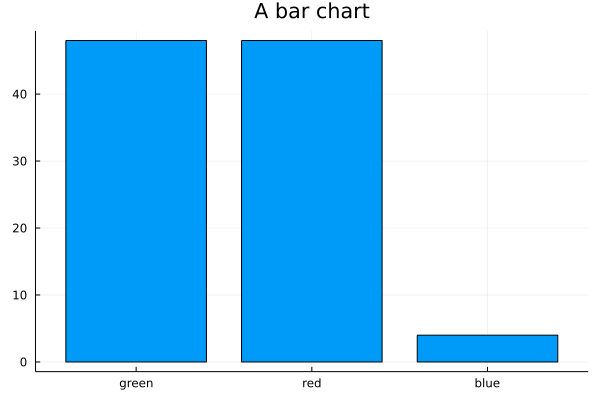

In [46]:
bar_labels = unique(sample_colours)
bar_heights = [length(filter(x -> x == i, sample_colours)) for i in unique(sample_colours)]
plot(bar_labels, bar_heights; st=:bar, label=false, title="A bar chart")

A histogram is a useful way of visualising count data e.g. the counts of sequence reads of a particular length. It works by sorting the data into intervals, or bins, and creating a bar with height proportional to the number of data in each bin. Let's create a histogram of the three random variables we created at the start of the notebook. We do this using the ``seriestype=:histogram`` keyword and we can let ``Plots`` automatically determine the bins for us or set them manually using the ``bin=Int64`` keyword. Let's try it out:

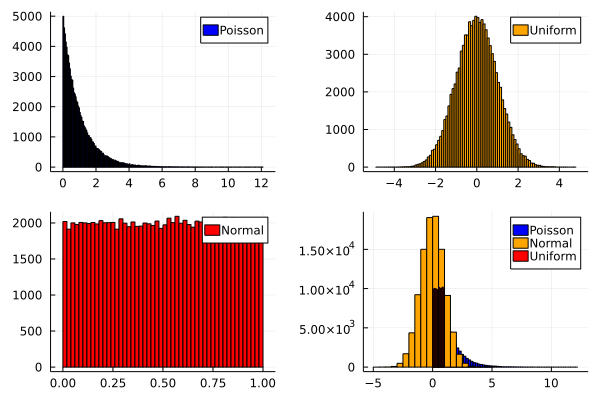

In [47]:
plt1 = plot(rp; st=:histogram, label="Poisson", colour=:blue);
plt2 = plot(rn; st=:histogram, label="Uniform", colour=:orange);
plt3 = plot(ru; st=:histogram, label="Normal", colour=:red);
plt4 = plot([rp, rn, ru]; st=:histogram, label = ["Poisson" "Normal" "Uniform"], colour = [:blue :orange :red], bin=[100 20 10]);

plot(plt1, plt2, plt3, plt4;layout=(2,2))

A two dimensional histogram can offer a similarly useful purpose when visualising two dimensional random data. It is specified using the ``seriestype=:histogram2d`` keyword. For example:

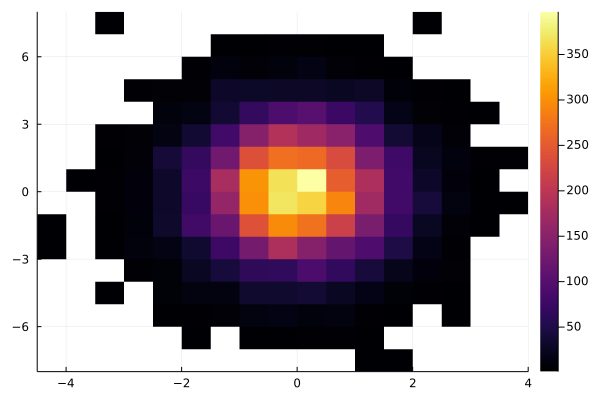

In [48]:
rv = randn(10000)
ru = randn(10000) * 2
plot(rv, ru; st=:histogram2d, bins=[20 15])

A denisty plot is similar to a histogram but instead of binning data it allows us to visualise, or approximate, a scaled version of the CDF of a set of data. It is specified using the ``seriestype=:density`` keyword. Let's plot the densities of our random data:

In [49]:
plot(rp; st=:density, label="Poisson", colour=:blue)
plot!(ru, st=:density, label="Uniform", colour=:red)
plot!(rn, st=:density, label="Normal", colour=:orange)

┌ Warning: seriestype density has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /home/nicholas_gale/.julia/packages/Plots/FCUr0/src/args.jl:1593
┌ Warning: seriestype density has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /home/nicholas_gale/.julia/packages/Plots/FCUr0/src/args.jl:1593


LoadError: The backend must not support the series type Val{:density}, and there isn't a series recipe defined.

## 3.2 StatsPlots

The ``StatsPlots`` package is a collection of recipes that build on the ``Plots`` backend but provide utility for various plot types which are specialised to the realm of statistics: 2D density plots, correlation plots, violin plots, boxplots, and many more. The [documentation](https://docs.juliaplots.org/latest/generated/statsplots/) gives detailed usage parameters.

In [50]:
using StatsPlots

``StatsPlots`` is designed to work well with ``DataFrames`` so let's begin by creating some dummy data.

In [51]:
body_length = vcat(3 .+ randn(100), 1.3 .+ randn(100))
wingspan = vcat(9 .+ randn(100).^2, 5 .+ randn(100))
antennae = vcat(1.7 .+ sqrt.(abs.(randn(100))), 1.3 .+ randn(100).^2)
specimen_label = vcat(rand(["Island 1", "Island 4"], 100), rand(["Island 2", "Island 3"], 100))
df_islands = DataFrame(Thorax=body_length, Wingspan=wingspan, Antenna=antennae, Location=specimen_label)
sort!(df_islands, :Location)

,Thorax,Wingspan,Antenna,Location
,Float64,Float64,Float64,String
1,2.472,9.00706,2.04646,Island 1
2,3.96249,9.22528,3.05296,Island 1
3,2.48982,11.6396,2.05821,Island 1
4,2.36741,11.2506,2.40517,Island 1
5,3.62425,9.04653,2.96821,Island 1
6,2.19296,9.20091,2.09488,Island 1
7,3.08552,9.70447,2.61153,Island 1
8,1.80124,9.37205,2.48797,Island 1
9,1.81508,12.1276,2.16617,Island 1


The ``@df`` macro allows you to specify a data frame which is then piped into the plotting routine. The syntax follows the structure: `` @df data plot(:factors...; keywords=...)``. This is rather opaque but once you begin to understand the grammar it becomes rather powerful. Let's start simple and try and get a box plot for just the Thorax length factor:

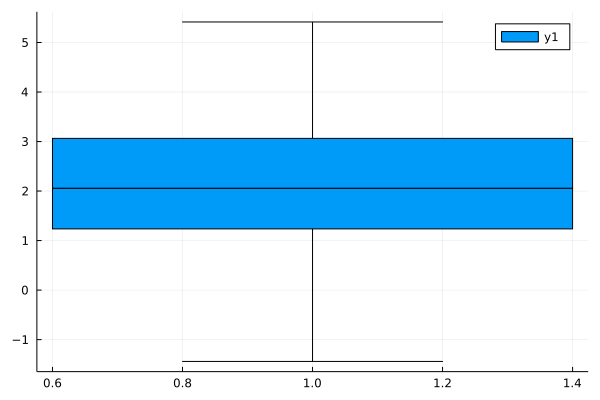

In [52]:
@df df_islands boxplot([:Thorax]; st=:boxplot)

That worked fairly well, let's see if we can add in the other length factors. The syntax to do this is by wrapping the factors in a vector.

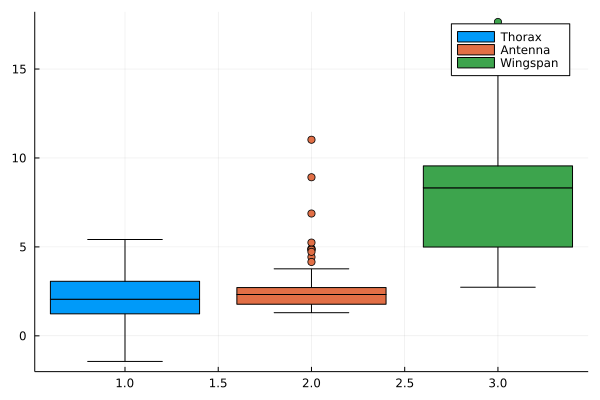

In [53]:
@df df_islands boxplot([:Thorax, :Antenna, :Wingspan]; box_position=:dodge, label=["Thorax" "Antenna" "Wingspan"])

That is starting to look pretty good, but it is not very informative. We know that there is another factor called "Location" which might reveal something interesting. Let's group them by that factor which we can specify as a name before the data columns:

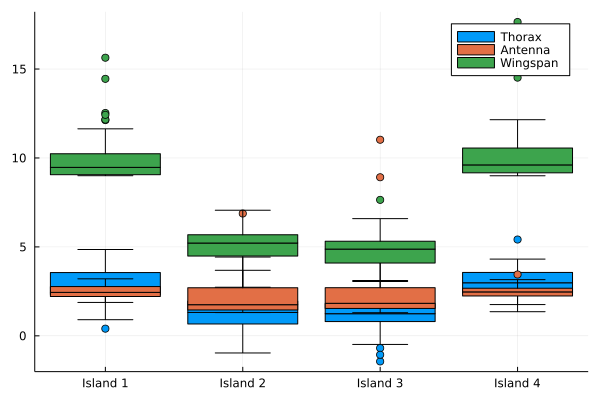

In [54]:
@df df_islands boxplot(:Location, [:Thorax, :Antenna, :Wingspan]; label=["Thorax" "Antenna" "Wingspan"])

That is beginning to look very informative. We are beginning to see that the islands look remarkably different for these measurements. Perhaps different species evolved on these islands? A violin plot Lets try a different plot: the violinplot. 

In [73]:
# @df df_islands groupedhist([:Thorax]; group=:Location, label=["Thorax" "Antenna" "Wingspan"])

# 4.0 A Worked Example

Let's put everything together with a worked example. Supppose you have been working with an experimentalist P.I. on the relationship between a mouses weight and the surface area of their pelt. Pretty grizzly, but at least you didn't have to be the one to skin them. This would be useful to other biologists who often might need an estimate of the surface area of the mouse but, understandbly, cannot skin their pelts (it might interfere with their experiments for some reason). The P.I. decides to send you the data which you can find in the directory: "./data/mice_experiment.csv". Let's load the data:

In [75]:
data = CSV.File("./data/mice_experiment.csv") |> DataFrame

,Weight,SurfaceArea,Experimenter
,Float64,Float64,String7
1,28.5802,108.526,Alice
2,28.7305,108.841,Alice
3,28.5377,105.946,Alice
4,28.134,106.618,Alice
5,29.2959,109.75,Alice
6,34.496,117.551,Alice
7,23.9603,96.7488,Alice
8,22.0167,94.176,Alice
9,27.3375,104.225,Alice


It looks like we have factors Weight and Surface area to play with. A good idea when we are getting started out with data is to plot it. Let's try a simple scatter plot for now:

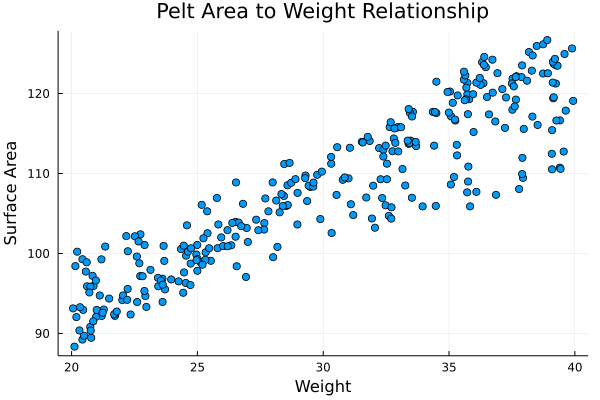

In [80]:
dataplot = plot(data[:, :Weight], data[:, :SurfaceArea]; st=:scatter, label=false, xlabel="Weight", ylabel="Surface Area", title="Pelt Area to Weight Relationship")

At a glance, this looks fairly linear. We can try fitting a linear model to the data frame and see what that yields. We could also add it to the plot.

In [79]:
linear_model = GLM.lm(@formula(SurfaceArea ~ Weight), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

SurfaceArea ~ 1 + Weight

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  63.7754    1.15769    55.09    <1e-99   61.4971    66.0537
Weight        1.47036   0.0376056  39.10    <1e-99    1.39635    1.54436
────────────────────────────────────────────────────────────────────────

The fit looks pretty good! Let's plot the fit against the data. We will also plot the residuals of the fit as a bar chart to give a quick visual confirmation that they are distributed randomly. 

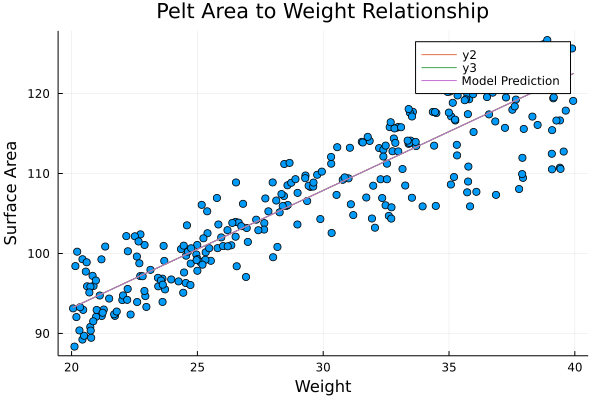

In [88]:
plot!(data[:, :Weight], predict(linear_model, data); label="Model Prediction")

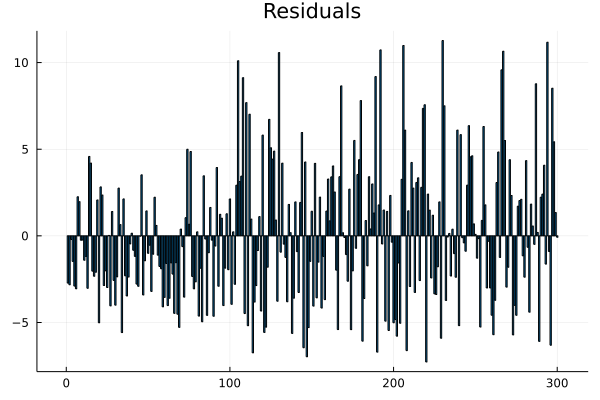

In [92]:
residuals = predict(linear_model, data) .- data[:, :SurfaceArea]
res_plot = plot(residuals; st=:bar, title=:Residuals, label=false)

That's interesting. The residuals seem to more negative at the beginning of the data, and more positive at the end of the data. We could go further in the residual analysis but now would be a good time to relook at the data. First, looking at the trend line we can visually confirm the residuals trend that we spotted - we expect this though and our eyes can lie to us in more ways than one. Looking at the data frame reveals that each measurement is also tagged with an experimenter. Let's use the ``StatsPlots`` package to see if we can plot all of them by name

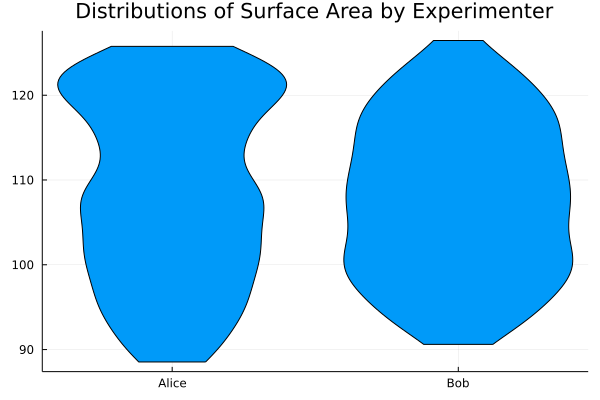

In [102]:
@df data violin(:Experimenter, [:SurfaceArea]; label=false, title="Distributions of Surface Area by Experimenter")

Those look quite different. Let's go back to the drawing board. We'll start by filtering the data for each of the experimenters individually and then plotting them against each other in contrasting colours.

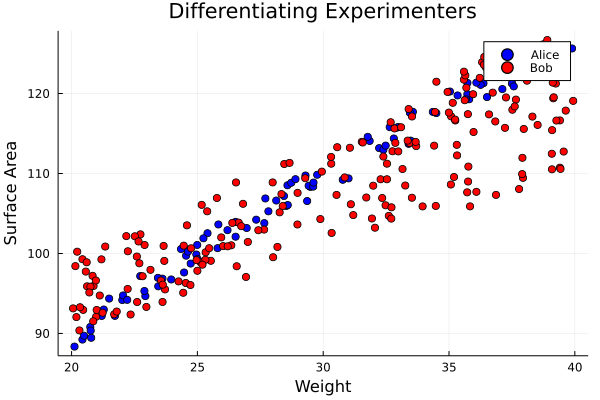

In [111]:
data_alice = filter(:Experimenter => x->x=="Alice", data);
data_bob = filter(:Experimenter => x->x=="Bob", data);
plot(data_alice[:,:Weight], data_alice[:, :SurfaceArea]; st=:scatter, title="Differentiating Experimenters", xlabel="Weight", ylabel="Surface Area", label="Alice", color=:blue)
plot!(data_bob[:,:Weight], data_bob[:, :SurfaceArea]; st=:scatter, label="Bob", color=:red)

Ok, there is definitely a difference between the two experimenters. Who do we trust? The first thing we should do is no longer assume that the data is linear: let's take log transforms to linearise it and perform model fits. Then we can examine those fits and the residuals.

In [116]:
log_data_alice = mapcols(x -> log.(x), data_alice[:, [:Weight, :SurfaceArea]]);
log_data_bob = mapcols(x -> log.(x), data_bob[:, [:Weight, :SurfaceArea]]);

In [120]:
model_alice = lm(@formula(SurfaceArea ~ Weight), log_data_alice)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

SurfaceArea ~ 1 + Weight

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  3.00121   0.0182019   164.88    <1e-99   2.96509    3.03733
Weight       0.498395  0.00537847   92.66    <1e-96   0.487722   0.509068
─────────────────────────────────────────────────────────────────────────

In [121]:
model_bob = lm(@formula(SurfaceArea ~ Weight), log_data_bob)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

SurfaceArea ~ 1 + Weight

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  3.46789    0.0442971  78.29    <1e-99   3.38054    3.55525
Weight       0.356614   0.013045   27.34    <1e-68   0.330889   0.382339
────────────────────────────────────────────────────────────────────────

These provide a better fit to Alice's data than Bob. Furthermore the coefficient for Alice's data suggests a scaling of ``SurfaceArea ~ sqrt(:Weight)`` which gels quite well with our intution.

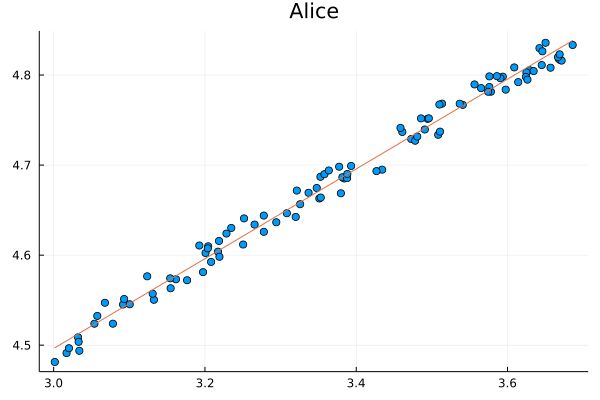

In [129]:
plot(log_data_alice[!, :Weight], log_data_alice[!, :SurfaceArea]; st=:scatter, label=false, title="Alice")
plot!(log_data_alice[!, :Weight], predict(model_alice, log_data_alice); label=false)

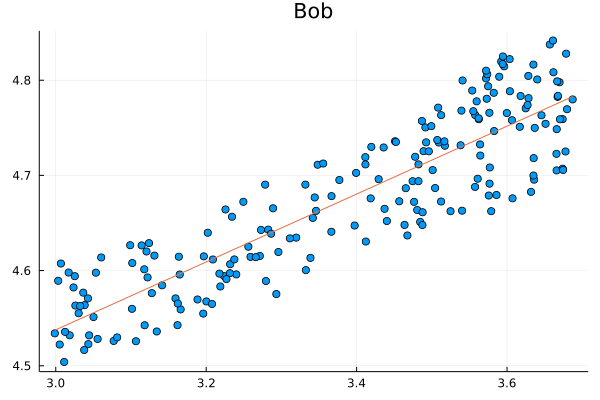

In [130]:
plot(log_data_bob[!, :Weight], log_data_bob[!, :SurfaceArea]; st=:scatter, label=false, title="Bob")
plot!(log_data_bob[!, :Weight], predict(model_bob, log_data_bob); label=false)

In [132]:
residuals_alice = log_data_alice[!, :SurfaceArea] .- predict(model_alice, log_data_alice);
residuals_bob = log_data_bob[!, :SurfaceArea] .- predict(model_bob, log_data_bob);

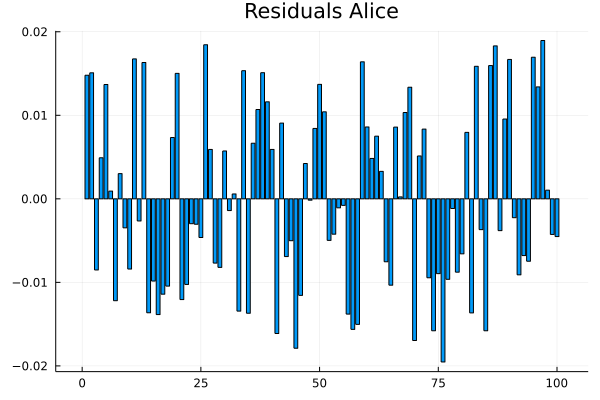

In [135]:
plot(residuals_alice; st=:bar, title="Residuals Alice", label=false)

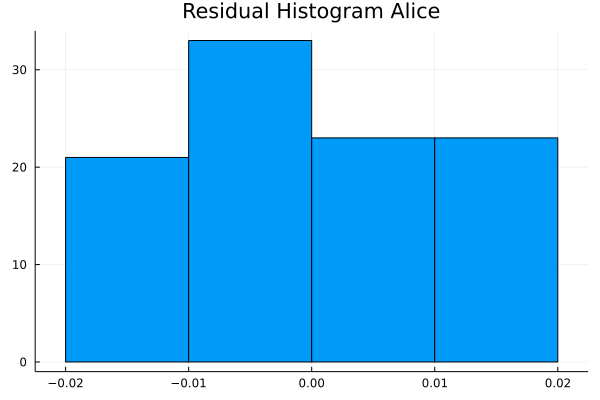

In [143]:
plot(residuals_alice; st=:histogram, bins=6, title="Residual Histogram Alice", label=false)

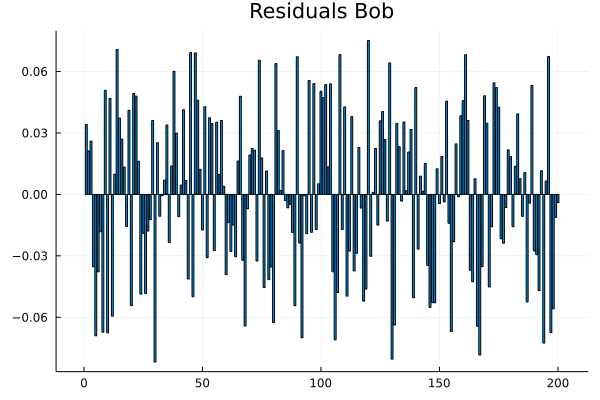

In [134]:
plot(residuals_bob; st=:bar, title="Residuals Bob", label=false)

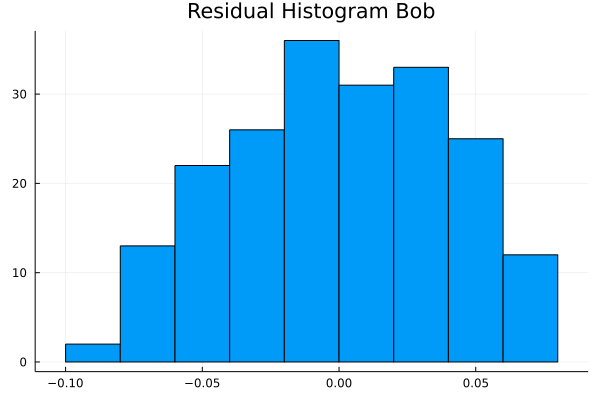

In [138]:
plot(residuals_bob; st=:histogram, title="Residual Histogram Bob", label=false)

Alice's residuals seem to be fairly well distributed while Bob's seem to have a slight skew. We could go further and examine how many residuals fall outside of the expected range assuming that they are normally distributed. However, we have a fairly substantial case that they are different to take back to our experimentalist colleague.

We cannot, at this point, say who is correct. We might like to put our money on Alice: her data makes for an intuitive model, her residuals aren't crazy, her data doesn't "fan" out. However, this is not evidence. At this point we should go back to the PI and let them know that these experiments need to be repeated. He might make our life easy and say one of the experimenters was always sloppy and has since left, but don't count on it!

*Data generated using the relationships derived measurements from the paper entitled: "THE SURFACE-AREA/BODY-WEIGHT RELATIONSHIP IN MICE" (N. Dawson, 1967)*